In [4]:
import numpy as np
import os
! pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import plotly.express as px



In [8]:
import os
os.getlogin()

'MHUZAIFA'

## Reading and Training frmo a Given Dataset


In [6]:
import pandas as pd


def read_accelerometer_data(filepath):
    with open(filepath, 'r') as csvfile:
        reader = csv.reader(csvfile)
    
        timestamps = []
        accel_x = []
        accel_y = []
        accel_z = []
        for row in reader:
            # print(row)

            timestamp = float(row[0])
            acceleration_x = float(row[1])
            acceleration_y = float(row[2])
            acceleration_z = float(row[3])
            
            if timestamp is not '':
                timestamps.append(timestamp)
                accel_x.append(acceleration_x)
                accel_y.append(acceleration_y)
                accel_z.append(acceleration_z)
            # data_point = {
            #     {'timestamp': timestamp},
            #     {'acceleration_x': acceleration_x},
            #     {'acceleration_y': acceleration_y},
            #     {'acceleration_z': acceleration_z}
            # }
            # data.append(data_point)
    dataAccel = [timestamps, accel_x, accel_y, accel_z]
    # df = pd.DataFrame()
    return dataAccel


<>:20: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:20: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\mhuzaifa\AppData\Local\Temp\ipykernel_26352\4002528684.py:20: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if timestamp is not '':


In [9]:
import pandas as pd
import csv
dataFile = '1.csv'
if os.getlogin() =='mhuzaifa' or os.getlogin() =='MHUZAIFA':
    datasetsAdd = '..\\Datasets\\WalkingActivity\\'
else:    
    datasetsAdd = 'C:\\Users\\mhuzaifa\\OneDrive\\OneDrive - DePaul University\\MOOC\\Machine Learning and Data Science\\Datasets\\WalkingActivity\\'
dataFileAdd = datasetsAdd + dataFile
dataAccel = read_accelerometer_data(dataFileAdd)


In [10]:

dAccel_PD = pd.DataFrame()
dAccel_PD['time']=dataAccel[0]
dAccel_PD['ax']=dataAccel[1]
dAccel_PD['ay']=dataAccel[2]
dAccel_PD['az']=dataAccel[3]

## Visualizing the Data

In [11]:
def plot_DF(df):
    # Plot each column individually
    for column in df.columns[1:]:
        print(column)
        plt.figure()
        plt.plot( df.loc[:, column])
        plt.title(f'{column} vs. time')
        plt.xlabel('time')
        plt.ylabel(column)
        plt.grid()

    # # Plot all columns together in a single plot
    # plt.figure()
    # for column in df.columns[1:]:
    #     plt.plot(df['time'], df[column], label=column)
    # plt.title('All Columns vs. time')
    # plt.xlabel('time')
    # plt.legend()
    # plt.grid()

    plt.show()

def plot_DF_zoom(df):
    # Plot each column individually
    for column in df.columns[1:]:
        fig = px.line(df, x='time', y=column, title=f'{column} vs. time')
        fig.update_layout(xaxis_title='time', yaxis_title=column)
        fig.show()

# Plot all columns together in a single plot
    # fig = px.line(df, x='time')
    # for column in df.columns[1:]:
    #     fig.add_scatter(x=df['time'], y=df[column], mode='lines', name=column)
    # fig.update_layout(title='All Columns vs. time', xaxis_title='time')
    # fig.show()



## Convert to Roll Pitch Yaw Angles


ax
ay
az


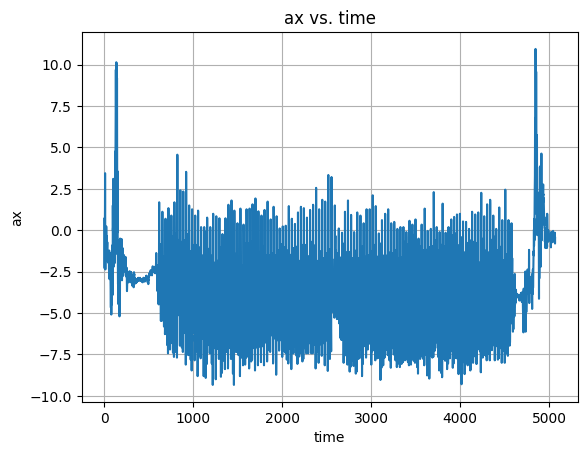

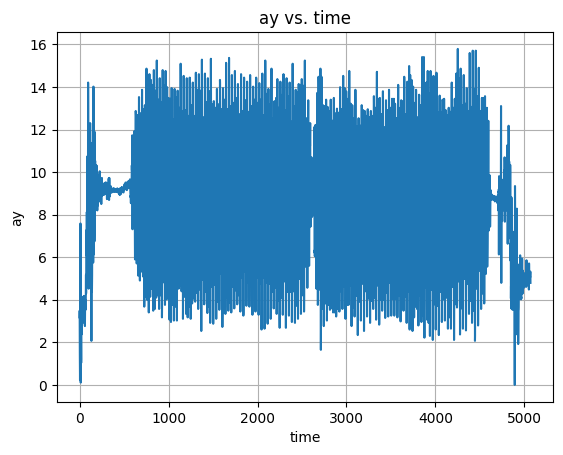

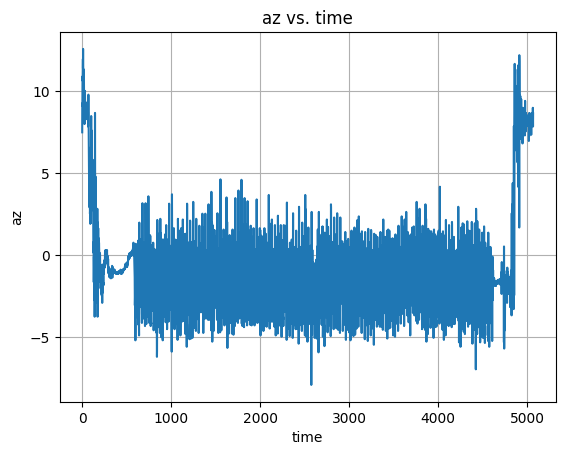

In [13]:
plot_DF(dAccel_PD)

In [13]:
read_accelerometer_data

<function __main__.read_accelerometer_data(filepath)>

## Generating a Corrupted Sinusoidal Dataset

In [14]:
time = np.linspace(0, 20, 100)
data = np.sin(time)
data.shape

(100,)

In [23]:
# generate synthetic time series data

timesteps = 100
num_samples = 1000
time = np.linspace(0, 20, timesteps)
data = np.sin(time) +0.1 * np.random.randn(num_samples, timesteps)

# split data into input (X) and target (y)

x = data[:, :-1]
y = data[:, 1:]

print('X: ', x)
print('Y: ', y)
#################

# Getting the data from a saved file
import csv

csv_file_obj = csv.reader('data/AirPassengers.csv')

for row in csv_file_obj:
    print(row)


X:  [[ 0.08991303  0.17576936  0.21657337 ...  0.46271518  0.78383706
   0.9103614 ]
 [-0.14926792  0.16080133  0.5140527  ...  0.4378019   0.50858923
   0.86488715]
 [ 0.00708449  0.1215323   0.49439987 ...  0.6471549   0.76755255
   0.88319676]
 ...
 [-0.11513578  0.28661288  0.2697262  ...  0.52882984  0.59367207
   0.81936702]
 [ 0.06441282  0.27225959  0.35464955 ...  0.60961769  0.75000348
   0.94616207]
 [ 0.05644064  0.23984153  0.34415363 ...  0.70642122  0.72001816
   0.80502151]]
Y:  [[0.17576936 0.21657337 0.54966018 ... 0.78383706 0.9103614  0.86634031]
 [0.16080133 0.5140527  0.80340408 ... 0.50858923 0.86488715 0.83182851]
 [0.1215323  0.49439987 0.54270155 ... 0.76755255 0.88319676 0.82370416]
 ...
 [0.28661288 0.2697262  0.50811656 ... 0.59367207 0.81936702 0.95715925]
 [0.27225959 0.35464955 0.64709386 ... 0.75000348 0.94616207 0.98143994]
 [0.23984153 0.34415363 0.64397816 ... 0.72001816 0.80502151 0.98327119]]
['d']
['a']
['t']
['a']
['/']
['A']
['i']
['r']
['P']
['

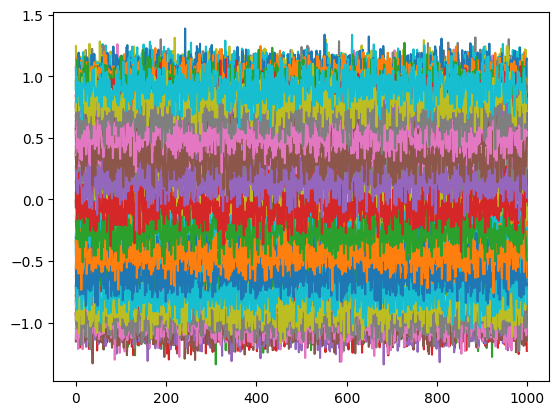

In [16]:
plt.plot(data)

In [17]:
data.shape
# data[:,:-1]

(1000, 100)

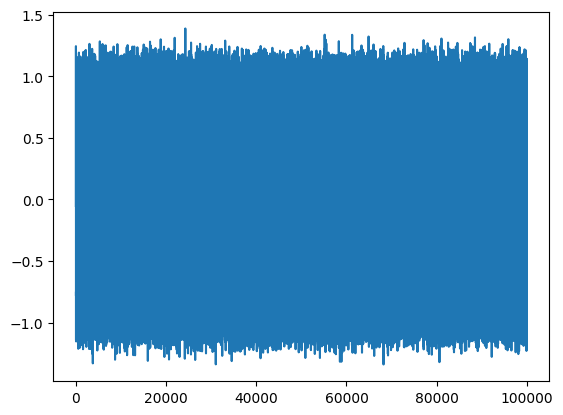

In [18]:
plt.plot(data.flatten())

## Reshaping the Data for Use with Recursive Neural Network

In [19]:

# Reshape data for RNN input

X = x[:, :, np.newaxis]
Y = y[:, :, np.newaxis]


In [20]:
Y.shape

(1000, 99, 1)

In [33]:
X.shape

(1000, 99, 1)

## Defining and Compiling the Model

In [21]:

# Define the RNN model

model = keras.Sequential(
    [layers.LSTM(50, return_sequences=True, input_shape=(timesteps-1,1)),
     layers.Dense(1)]
)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, Y, epochs = 10, batch_size=64)

# Generate predictions
initial_sequence = X[0] 
predicted_sequence = model.predict(initial_sequence[np.newaxis, :, :])

Epoch 1/10


c:\Users\mhuzaifa\.conda\envs\RETFound\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.4169
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1065
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0370
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0223
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0175
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0152
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0138
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0129
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0122
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0119
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


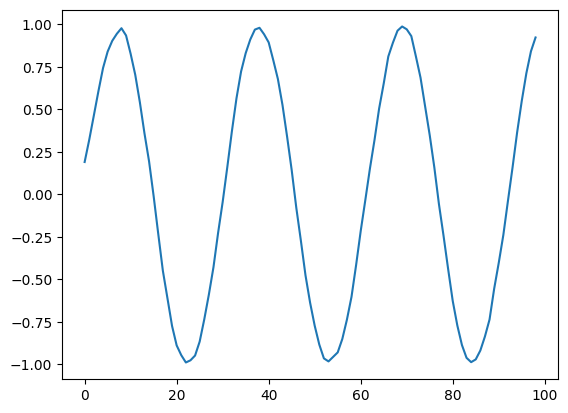

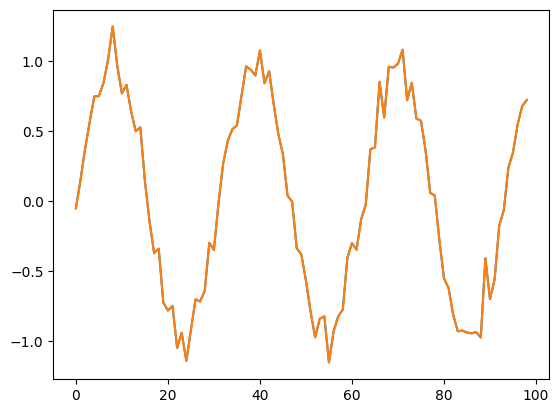

In [22]:
predicted_plot = predicted_sequence.reshape(99,1)

plt.figure()
plt.plot(predicted_plot)
plt.show()

X_plot = X.reshape(np.size(X), 1)
Y_plot = X.reshape(np.size(Y), 1)
plt.figure()
plt.plot(X_plot[:len(predicted_plot)])
plt.plot(Y_plot[:len(predicted_plot)])
plt.show()